In [1]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set()

In [2]:
def make_regression(func, n_elements, noise=0.0, random_state=None):
    rng = np.random.RandomState(random_state)
    x = rng.uniform(5.0, size=n_elements)
    n = rng.normal(scale=noise, size=n_elements)
    y = func(x) + n
    return x.reshape(-1, 1), y

def plot_regression_line(clf, xb, yb, n=100):
    xx = np.linspace(*xb, n).reshape(-1, 1)
    yy = clf.predict(xx)
    plt.plot(xx, yy, color='red', linewidth=20, alpha=0.3)

In [3]:
X, y = make_regression(lambda x: x**2 + 2*x, 1000, random_state=0, noise=5.0)
train_idx, test_idx = train_test_split(np.argsort(X.ravel()), shuffle=False, test_size=0.3)
train_X, train_y = X[train_idx], y[train_idx]
test_X, test_y = X[test_idx], y[test_idx]

train_X, bridge_X, train_y, bridge_y = train_test_split(train_X, train_y, random_state=0, test_size=0.1)
dev_X, test_X, dev_y, test_y = train_test_split(test_X, test_y, random_state=0, test_size=0.66)

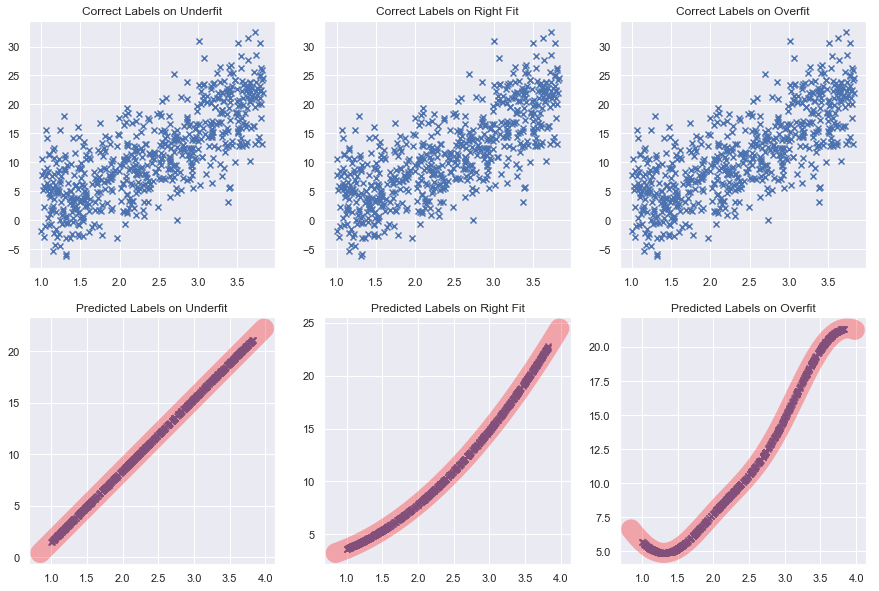

In [4]:
names = ['Underfit', 'Right Fit', 'Overfit']
clfs = [
    SVR(kernel='linear'),
    SVR(kernel='poly', degree=2, gamma='auto'),
    SVR(kernel='rbf', gamma='auto')
]

plt.figure(figsize=(15, 10))
for idx, (clf, name) in enumerate(zip(clfs, names), 1):
    clf.fit(train_X, train_y)
    pred = clf.predict(train_X)
    plt.subplot(2, 3, idx)
    plt.title(f'Correct Labels on {name}')
    plt.scatter(train_X.ravel(), train_y, marker='x')
    plt.subplot(2, 3, idx+3)
    plt.title(f'Predicted Labels on {name}')
    plt.scatter(train_X.ravel(), pred, marker='x')
    plot_regression_line(clf, plt.xlim(), plt.ylim())
plt.show()

In [5]:
print('Error on Train Set')
for idx, clf in enumerate(clfs, 1):
    pred = clf.predict(train_X)
    error = mean_squared_error(train_y, pred)
    print(f'Error for model#{idx}: {error}')

Error on Train Set
Error for model#1: 24.158321276143283
Error for model#2: 23.29616981010034
Error for model#3: 23.22675249762989


In [6]:
print('Error on Development Set')
for idx, clf in enumerate(clfs, 1):
    pred = clf.predict(dev_X)
    error = mean_squared_error(dev_y, pred)
    print(f'Error for model#{idx}: {error}')

Error on Development Set
Error for model#1: 32.706011962826125
Error for model#2: 20.11508860677481
Error for model#3: 154.26644556317484


In [7]:
print('Error on Bridge Set')
print('Since the Bridge Set Error is close to the Train Set Error')
print('It means our Development Set result is based on what the data split can provide us')
print('Thus if the Development Set error is too large, the algorithms needs a better distribution of the data')
for idx, clf in enumerate(clfs, 1):
    pred = clf.predict(bridge_X)
    error = mean_squared_error(bridge_y, pred)
    print(f'Error for model#{idx}: {error}')

Error on Bridge Set
Since the Bridge Set Error is close to the Train Set Error
It means our Development Set result is based on what the data split can provide us
Thus if the Development Set error is too large, the algorithms needs a better distribution of the data
Error for model#1: 20.520127655452786
Error for model#2: 19.430343149290625
Error for model#3: 19.934586065226195


In [8]:
print('Error on Test Set')
for idx, clf in enumerate(clfs, 1):
    pred = clf.predict(test_X)
    error = mean_squared_error(test_y, pred)
    print(f'Error for model#{idx}: {error}')

Error on Test Set
Error for model#1: 43.78997874518574
Error for model#2: 26.546521382708075
Error for model#3: 169.19918555030523
